# Laboratorium 1


### Konfiguracja

In [18]:
%matplotlib inline
import random
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.collections as mcoll
import matplotlib.colors as mcolors
import json as js

### Interfejsy

[Dostępne kolory](https://matplotlib.org/3.1.1/gallery/color/named_colors.html)
%matplotlib inline
[Dostępne znaczniki punktów](https://matplotlib.org/3.1.1/api/markers_api.html#module-matplotlib.markers)

In [19]:
class PointsCollection:
    def __init__(self, points = [], color = None, marker = None):
        self.points = np.array(points)
        self.color = color
        self.marker = marker
        
class LinesCollection:
    def __init__(self, lines = [], color = None):
        self.color = color
        self.lines = lines
        
    def add(self, line):
        self.lines.append(line)
        
    def get_collection(self):
        if self.color:
            return mcoll.LineCollection(self.lines, [mcolors.to_rgba(self.color)] * len(self.lines))
        else:
            return mcoll.LineCollection(self.lines)

class Plot:
    def __init__(self, points=[], lines=[], json = None):
        if json is None:
            self.points = points
            self.lines = lines
        else:
            self.points = [PointsCollection(pointsCol) for pointsCol in js.loads(json)["points"]]
            self.lines = [LinesCollection(linesCol) for linesCol in js.loads(json)["lines"]]
            
    def draw(self):
        plt.close()
        ax = plt.axes()
        for collection in self.points:
            if collection.points.size > 0:
                ax.scatter(*zip(*collection.points), c=collection.color, marker=collection.marker)
        for collection in self.lines:
            ax.add_collection(collection.get_collection())
        ax.autoscale()
        plt.draw()
        
    def toJSON(self):
        return js.dumps({"points": [pointCol.points.tolist() for pointCol in self.points], 
                          "lines":[linesCol.lines for linesCol in self.lines]})

### Przykład użycia

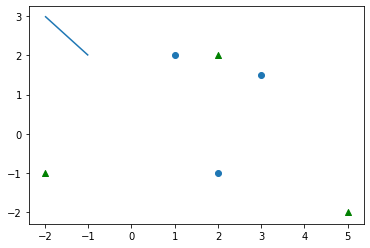

In [20]:
%matplotlib inline
%matplotlib inline

plot = Plot([PointsCollection([(1, 2), (3, 1.5), (2, -1)]), 
             PointsCollection([(5, -2), (2, 2), (-2, -1)], color = 'green', marker = "^")], 
            [LinesCollection([[(-1,2),(-2,3)]])])
plot.draw()

# Rozwiązanie

## zad 1, 2

### dataset 1

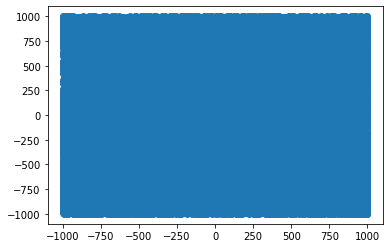

In [21]:
%matplotlib inline
def zad_1_a():
    p = []
    for i in range(0, pow(10, 5)):
        p.append((random.uniform(-1000, 1000), random.uniform(-1000, 1000)))
    return p

plot = Plot([PointsCollection(zad_1_a())])
plot.draw()

### dataset 2

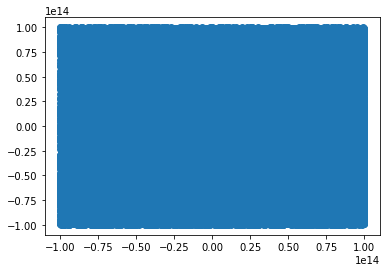

In [22]:
%matplotlib inline
def zad_1_b():
    p = []
    for i in range(0, pow(10, 5)):
        p.append((random.uniform(-pow(10, 14), pow(10, 14)), random.uniform(-pow(10, 14), pow(10, 14))))
    return p

plot = Plot([PointsCollection(zad_1_b())])
plot.draw()

### dataset 3

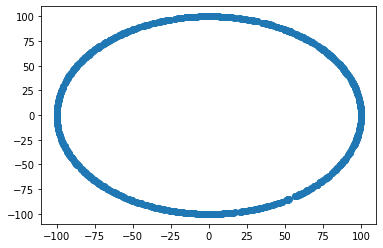

In [23]:
%matplotlib inline
def zad_1_c():
    p = []
    for i in range(0, 1000):
        theta = random.random() * 2 * np.pi
        p.append((np.cos(theta) * 100, np.sin(theta) * 100))
    return p

plot = Plot([PointsCollection(zad_1_c())])
plot.draw()

### dataset 4

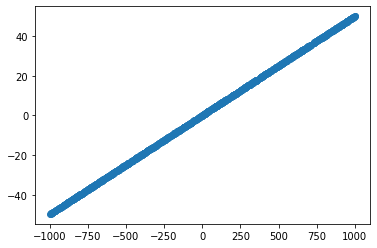

In [24]:
%matplotlib inline
def zad_1_d():
    points = []
    a = [-1.0, 0.0]
    b = [1.0, 0.1]
    m = (b[1] - a[1]) / (b[0] - a[0])
    c = a[1] - a[0] * m
    for i in range(0, 1000):
        x = random.uniform(-1000, 1000)
        y = m * x + c
        points.append((x, y))
    return points

plot = Plot([PointsCollection(zad_1_d())])
plot.draw()

In [25]:
def det_1(c, epsilon=0):
    a = (-1.0, 0.0, 1)
    b = (1.0, 0.1, 1)
    c = (c[0], c[1], 1)
    det = a[0] * b[1] * c[2] + a[1] * b[2] * c[0] + a[2] * b[0] * c[1] - a[2] * b[1] * c[0] - a[1] * b[0] * c[2] - a[
        0] * b[2] * c[1]
    if det < -epsilon:
        return -1
    if det > epsilon:
        return 1
    else:
        return 0


def det_2(c, epsilon=0):
    a = (-1.0, 0.0)
    b = (1.0, 0.1)
    ca = (c[0] - a[0], c[1] - a[1])
    cb = (c[0] - b[0], c[1] - b[1])
    det = ca[0] * cb[1] - ca[1] * cb[0]
    if det < -epsilon:
        return -1
    if det > epsilon:
        return 1
    else:
        return 0

#zad 3, 4
    

## dataset 1

### epsilon = 0

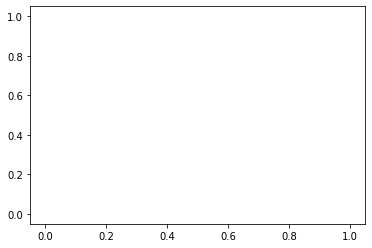

In [26]:
%matplotlib inline
dataset = zad_1_a()
diff =  [x for x in dataset if det_1(x, 0)!=det_2(x,0)]
plot = Plot([PointsCollection(diff)])
plot.draw()

### epsilon = 0.1

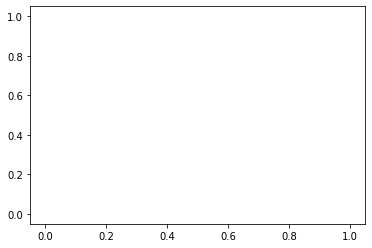

In [27]:
%matplotlib inline
diff =  [x for x in dataset if det_1(x, 0.1)!=det_2(x,0.1)]
plot = Plot([PointsCollection(diff)])
plot.draw()

### epsilon = 0.5

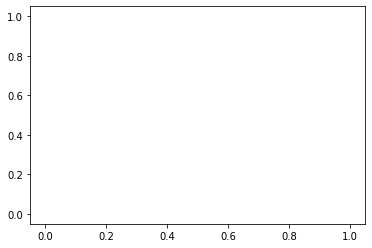

In [28]:
%matplotlib inline
diff =  [x for x in dataset if det_1(x, 0.5)!=det_2(x,0.5)]
plot = Plot([PointsCollection(diff)])
plot.draw()

### epsilon = 1

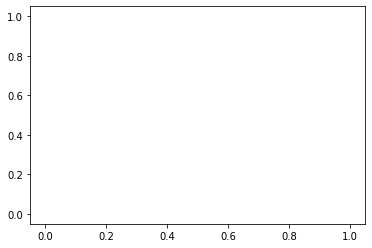

In [29]:
%matplotlib inline
diff =  [x for x in dataset if det_1(x, 1)!=det_2(x,1)]
plot = Plot([PointsCollection(diff)])
plot.draw()

## dataset 2

### epsilon = 0

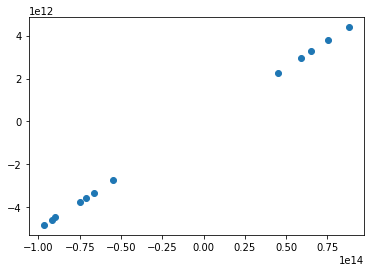

In [30]:
%matplotlib inline
dataset = zad_1_b()
diff =  [x for x in dataset if det_1(x, 0)!=det_2(x,0)]
plot = Plot([PointsCollection(diff)])
plot.draw()

### epsilon = 0.1

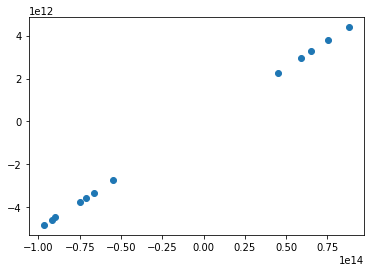

In [31]:
%matplotlib inline
diff =  [x for x in dataset if det_1(x, 0.1)!=det_2(x,0.1)]
plot = Plot([PointsCollection(diff)])
plot.draw()

### epsilon = 0.5

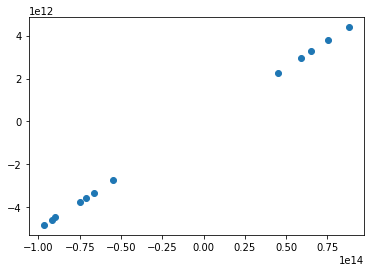

In [32]:
%matplotlib inline
diff =  [x for x in dataset if det_1(x, 0.5)!=det_2(x,0.5)]
plot = Plot([PointsCollection(diff)])
plot.draw()

### epsilon = 1

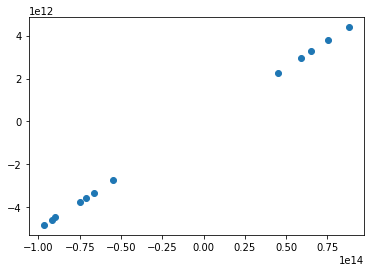

In [33]:
%matplotlib inline
diff =  [x for x in dataset if det_1(x, 1)!=det_2(x,1)]
plot = Plot([PointsCollection(diff)])
plot.draw()

## dataset 3

### epsilon = 0

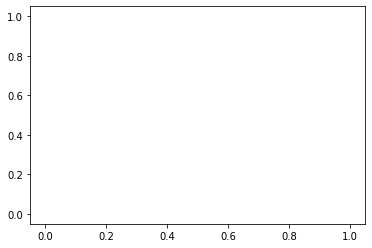

In [34]:
%matplotlib inline
dataset = zad_1_c()
diff =  [x for x in dataset if det_1(x, 0)!=det_2(x,0)]
plot = Plot([PointsCollection(diff)])
plot.draw()

### epsilon = 0.1

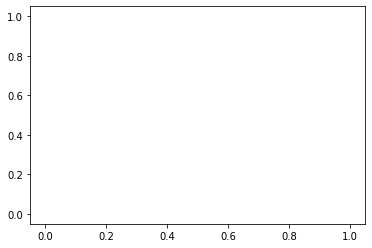

In [35]:
%matplotlib inline
diff =  [x for x in dataset if det_1(x, 0.1)!=det_2(x,0.1)]
plot = Plot([PointsCollection(diff)])
plot.draw()

### epsilon = 0.5

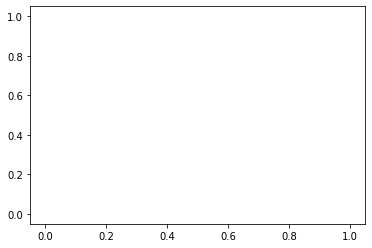

In [36]:
%matplotlib inline
diff =  [x for x in dataset if det_1(x, 0.5)!=det_2(x,0.5)]
plot = Plot([PointsCollection(diff)])
plot.draw()

### epsilon = 1

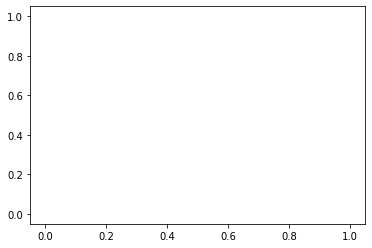

In [37]:
%matplotlib inline
diff =  [x for x in dataset if det_1(x, 1)!=det_2(x,1)]
plot = Plot([PointsCollection(diff)])
plot.draw()

## dataset 4

### epsilon = 0

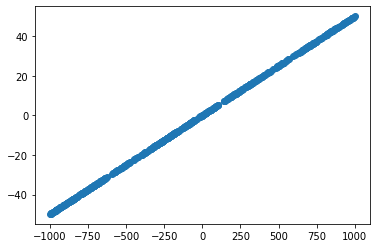

In [38]:
%matplotlib inline
dataset = zad_1_d()
diff =  [x for x in dataset if det_1(x, 0)!=det_2(x,0)]
plot = Plot([PointsCollection(diff)])
plot.draw()

### epsilon = 0.1

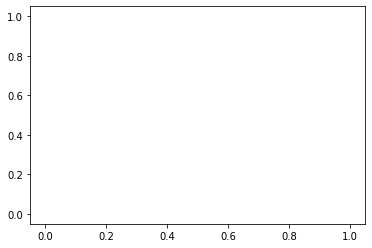

In [39]:
%matplotlib inline
diff =  [x for x in dataset if det_1(x, 0.1)!=det_2(x,0.1)]
plot = Plot([PointsCollection(diff)])
plot.draw()

### epsilon = 0.5

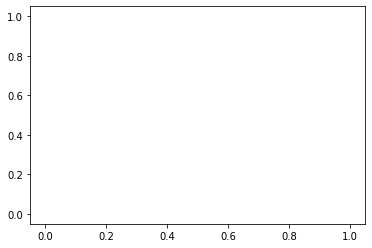

In [40]:
%matplotlib inline
diff =  [x for x in dataset if det_1(x, 0.5)!=det_2(x,0.5)]
plot = Plot([PointsCollection(diff)])
plot.draw()

### epsilon = 1

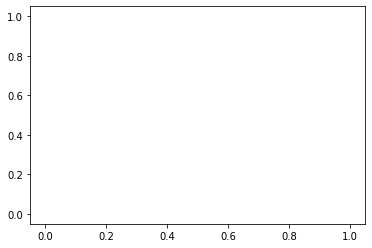

In [41]:
%matplotlib inline
diff =  [x for x in dataset if det_1(x, 1)!=det_2(x,1)]
plot = Plot([PointsCollection(diff)])
plot.draw()